In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *
%matplotlib inline

In [2]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [3]:
# predicted biclusters 
tool_name = "ISA"
tool_suffix = "ISA"
n_runs = 10

#parameters = (("no_seeds",[0.05,0.1,0.15,0.2,0.25,0.3, 0.35, 0.4,0.45 ,0.5]))
parameters = [ ("no_seeds", [1,2,3,4,5]+range(10,110,10)+[125,150,200])]

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [14]:
parameters

[('no_seeds',
  [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 200])]

In [4]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/ISA/no_seeds=10/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.ISA.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.016970119127881225
1 0.017341381628395616
2 0.01764795131234069
3 0.017800479763283684
4 0.01808677839131047
5 0.017653611502194154
6 0.015372433796336874
7 0.01954447523669385
8 0.018010793384964724
9 0.018772452738417458


In [5]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)

results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.ISA.biclust_results.txt
Failed to parse ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.ISA.biclust_results.txt
File not found ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.ISA.biclust_results.txt
Failed to parse ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.ISA.biclust_results.txt
File not found ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=100,50.overlap=TT.ISA.biclust_results.txt
Failed to parse ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=100,50.overlap=TT.ISA.biclust_results.txt
File not found ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.ISA.biclust_results.txt
Failed to parse ../simulated_datasets/results/ISA/no_seeds=1/simulated.N=10.Mu=2.0.GxP=100,100.overl

In [6]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,no_seeds,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,1,10,0.001376,0.001028,0.001189
1,5,10,1,9,0.001829,0.001431,0.001618
2,5,10,1,8,0.001822,0.001037,0.001375
3,5,10,1,3,0.001240,0.000379,0.000685
4,5,10,1,9,0.001382,0.000607,0.000916
5,5,10,1,6,0.004667,0.003167,0.003844
6,5,10,1,9,0.001109,0.000798,0.000941
7,5,10,1,6,0.000658,0.000821,0.000735
8,5,10,1,9,0.001489,0.001034,0.001241
9,5,10,1,8,0.003938,0.003288,0.003599


In [7]:
parameters

[('no_seeds',
  [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 200])]

Total combinations: 18
[ 20  30  40  10  50  60  70  80  90 100 125 150 200   5   4   3   2   1]
Top 20 paramter combinations


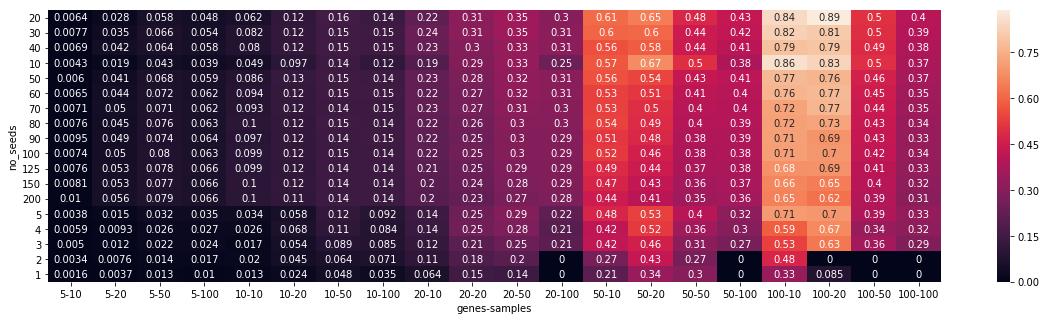

In [31]:
params = ["no_seeds"]
heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = [5,10,20,50,100], s_sizes = [10,20,50,100],
                          plot=True,outfile=heatmap_outfile)

In [32]:
params

['no_seeds']

In [33]:
default_params = ([100])

In [35]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 3600 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.3299855507262865
20
0.01	0.03	0.06	0.05	0.06	0.12	0.16	0.14	0.22	0.31	0.35	0.3	0.61	0.65	0.48	0.43	0.84	0.89	0.5	0.4
	no_seeds=('Geometric_Mean', 'mean');
	Max. avg. Geometric_Mean: 0.33 ± 0.263
	Max. avg. Relevance: 0.222 ± 0.23
	Max. avg. Recovery: 0.522 ± 0.352
	Max. avg. n_biclusters: 58.85 ± 32.641
With Default parameters:
[100]
[0.01 0.05 0.08 0.06 0.1  0.12 0.15 0.14 0.22 0.25 0.3  0.29 0.52 0.46
 0.38 0.38 0.71 0.7  0.42 0.34]
	no_seeds=100;
	avg. Geometric_Mean: 0.284 ± 0.202
	avg. Relevance: 0.147 ± 0.141
	avg. Recovery: 0.586 ± 0.356
	avg. n_biclusters: 203.68 ± 137.445


,Geometric_Mean,Relevance,Recovery,n_biclusters
,mean,mean,mean,mean
no_seeds,,,,
20,0.329986,0.221645,0.521733,58.85
